In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Importing Libraries***




In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#***Loading the Dataset From Google Drive***

In [121]:
data = pd.read_csv("/content/drive/MyDrive/weatherHistory.csv")

# ***Lets take a Preview....***

In [122]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# ***Check for missing Values***

In [123]:
data.isna().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


# ***Drop Unnecessary Columns***

In [124]:
data.drop(labels=data.columns[0],axis=1,inplace=True)

In [125]:
data.drop(labels=data.columns[-1],axis=1,inplace=True)

In [126]:
data.drop(labels=data.columns[-2],axis=1,inplace=True)

In [127]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


# ***Fill missing Values***

In [128]:
data["Precip Type"].fillna(value=data["Precip Type"].value_counts().index[data["Precip Type"].value_counts().argmax()],
                           inplace=True)

<ipython-input-128-0c81ec25109a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Precip Type"].fillna(value=data["Precip Type"].value_counts().index[data["Precip Type"].value_counts().argmax()],


# ***Discreet Value Columns***

In [129]:
for single_column in ["Precip Type","Summary"]:

  print("The unique values in {} column are {}".format(single_column,
                                                       data[single_column].unique()))

The unique values in Precip Type column are ['rain' 'snow']
The unique values in Summary column are ['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']


# ***Function for One hot encoding***

In [130]:
def convert_to_ohe_df(column_name):# One hot encoding

  model_unique_values = data[column_name].unique().shape[0]
  identity_matrix = np.eye(model_unique_values,model_unique_values)
  ohe_models = identity_matrix[data[column_name]]
  df_column_names = [column_name+str(i) for i in range(model_unique_values)]
  column_df = pd.DataFrame(data=ohe_models,columns=df_column_names)

  return column_df

# ***Converting Character columns to numerical values for one hot encoding***

In [131]:
for single_column in ["Precip Type","Summary"]:

  column_unique_values = data[single_column].unique()
  data[single_column].replace(to_replace=column_unique_values,
                              value=list(range(column_unique_values.shape[0])),
                              inplace=True)

<ipython-input-131-57ee700b346d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[single_column].replace(to_replace=column_unique_values,
<ipython-input-131-57ee700b346d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[single_column].replace(to_replace=column_unique_values,


#***One hot encoding***

In [132]:
for single_column in ["Precip Type" , "Summary"]:

  column_df = convert_to_ohe_df(single_column)
  data.drop(labels=single_column,axis=1,inplace=True)
  data = pd.concat([data,column_df],axis=1)

In [133]:
data.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type0,Precip Type1,Summary0,...,Summary17,Summary18,Summary19,Summary20,Summary21,Summary22,Summary23,Summary24,Summary25,Summary26
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#***Pearson Corelation of the columns with each other to get the most corelated columns for further analysis***

In [134]:
pearson_corr = list()

for single_column in data.columns:
  pearson_corr.append(data["Apparent Temperature (C)"].corr(data[single_column]))

relevant_columns_idx = np.argwhere(np.abs(np.array(pearson_corr))>10**(-2))

In [135]:
relevant_columns_idx[:,0]

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 16, 17, 18, 20,
       21, 22, 23, 24, 27, 33])

In [136]:
data = data.iloc[:,relevant_columns_idx[:,0]]

<Figure size 2500x2500 with 0 Axes>

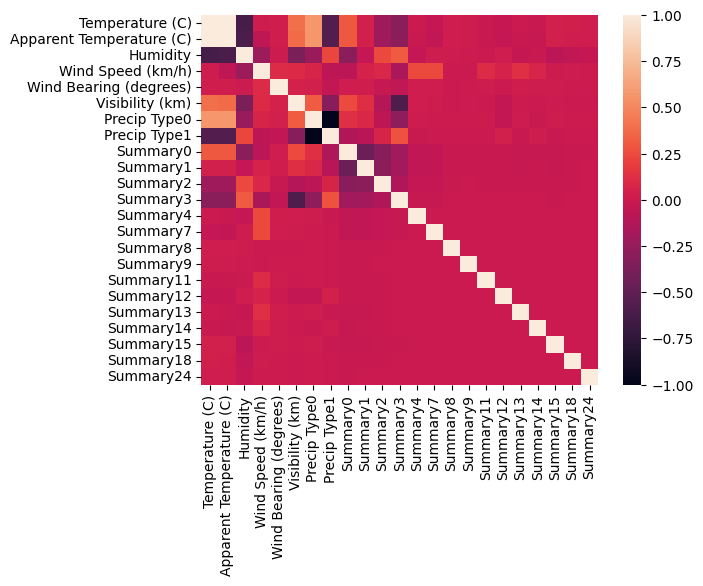

<Figure size 2500x2500 with 0 Axes>

In [137]:
sns.heatmap(data.corr(),xticklabels=True,yticklabels=True)
plt.figure(figsize=(25,25))

#***Training and Testing Split***

In [138]:
training_data_len = int(0.7 * data.shape[0])
training_data = data.iloc[0:training_data_len,:]

testing_data = data.iloc[training_data_len:,:]

In [139]:
training_data.shape

(67517, 23)

In [140]:
testing_data.shape

(28936, 23)

#***X_train and Y_train Split***

In [141]:
column_to_exclude = 'Apparent Temperature (C)'
column_indices = data.columns[data.columns != column_to_exclude]

X_train = training_data.iloc[:, testing_data.columns.get_indexer(column_indices)].to_numpy()
y_train = training_data["Apparent Temperature (C)"].to_numpy()

X_test = testing_data.iloc[:, testing_data.columns.get_indexer(column_indices)].to_numpy()
y_test = testing_data["Apparent Temperature (C)"].to_numpy()


In [142]:
X_train.shape

(67517, 22)

In [143]:
y_train.shape

(67517,)

In [144]:
X_test.shape

(28936, 22)

In [145]:
y_test.shape

(28936,)

#***Linear Regression Model***

In [146]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

#***Accuracy and Precision***

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 1.0057114676576455
Mean Absolute Error: 0.7967358050442989
R-squared: 0.9893844068846068
